## Set-up

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [60]:
category = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]

In [61]:
train_data = pd.read_csv('adult_data.csv', names=category);
train_data;

## Imputation

In [62]:
# deal with ?
# in workclass, occupation, native-country

# workclass: replace by most frequent workclass -- Private
train_data['workclass'] = train_data['workclass'].replace(' ?', ' Private')

# occupation: replace by most frequent occupation -- Prof-specialty
train_data['occupation'] = train_data['occupation'].replace(' ?', ' Prof-specialty')

# occupation: replace by most frequent native-country -- United-States
train_data['native-country'] = train_data['native-country'].replace(' ?', ' United-States')



## Feature Engineering

In [54]:
train_data.dtypes
# The code below will transfer all the string into int to smoothen the processing

age               int64
workclass         int64
fnlwgt            int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [63]:
# age group

''' 
Reference:
<21 => 0
21-30 => 1
31-40 => 2
41-50 => 3
51-60 => 4
61-70 => 5
71-80 => 6
81-90 => 7
'''

train_data['age'] = train_data['age'].astype(int)
train_data['age'] = train_data['age'].mask(train_data['age'] < 21, 0)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 21) & (train_data['age'] < 31), 1)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 31) & (train_data['age'] < 41), 2)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 41) & (train_data['age'] < 51), 3)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 51) & (train_data['age'] < 61), 4)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 61) & (train_data['age'] < 71), 5)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 71) & (train_data['age'] < 81), 6)
train_data['age'] = train_data['age'].mask((train_data['age'] >= 81), 7)

train_data['age'].value_counts()

2    8546
1    8162
3    6983
4    4128
0    2410
5    1792
6     441
7      99
Name: age, dtype: int64

In [64]:
# workclass
''' 
Reference:
Without pay => 0
Never-worked => 1
Self-emp-inc => 2
Self-emp-not-inc => 3
Federal-gov => 4
State-gov => 5
Local-gov => 6
Private => 7
'''
train_data['workclass'] = train_data['workclass'].replace(' Without-pay', 0)
train_data['workclass'] = train_data['workclass'].replace(' Never-worked', 1)
train_data['workclass'] = train_data['workclass'].replace(' Self-emp-inc', 2)
train_data['workclass'] = train_data['workclass'].replace(' Self-emp-not-inc', 3)
train_data['workclass'] = train_data['workclass'].replace(' Federal-gov', 4)
train_data['workclass'] = train_data['workclass'].replace(' State-gov', 5)
train_data['workclass'] = train_data['workclass'].replace(' Local-gov', 6)
train_data['workclass'] = train_data['workclass'].replace(' Private', 7)

train_data['workclass'].value_counts()

7    24532
3     2541
6     2093
5     1298
2     1116
4      960
0       14
1        7
Name: workclass, dtype: int64

In [65]:
# education
''' 
education and education-num are same thing so just combine them together

Reference:
Pre-school, 1st - 12th => Not finished high school => 0
HS-grad => finished high school => 1 
Asso-acdm, Asso-voc, Some-college => Asso & not finished UG => 2
Bachelors => 3
Masters, Doctorate, Prof-school => Post-grad => 4
'''
train_data['education-num'] = train_data['education-num'].replace([1, 2, 3, 4, 5, 6, 7, 8], 0)
train_data['education-num'] = train_data['education-num'].replace(9, 1)
train_data['education-num'] = train_data['education-num'].replace([10, 11, 12], 2)
train_data['education-num'] = train_data['education-num'].replace(13, 3)
train_data['education-num'] = train_data['education-num'].replace([14, 15, 16], 4)

train_data = train_data.drop(columns = ['education'])
train_data = train_data.rename(columns={'education-num':'education'})

train_data['education'].value_counts()

1    10501
2     9740
3     5355
0     4253
4     2712
Name: education, dtype: int64

In [66]:
# occupation
''' 
Reference:
'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'
= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
'''
train_data['occupation'] = train_data['occupation'].replace([' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'], range(14))



train_data['occupation'].value_counts()



5     5983
1     4099
4     4066
8     3770
3     3650
2     3295
7     2002
10    1597
6     1370
9      994
0      928
12     649
11     149
13       9
Name: occupation, dtype: int64

In [67]:
# relationship
''' 
Reference:
'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'
= [0, 1, 2, 3, 4, 5]
'''
train_data['relationship'] = train_data['relationship'].replace([' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried'], range(6))

train_data['relationship'].value_counts()

2    13193
3     8305
1     5068
5     3446
0     1568
4      981
Name: relationship, dtype: int64

In [68]:
# race
''' 
Reference:
'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'Have capital gain => 1
= [0, 1, 2, 3, 4]
'''

train_data['race'] = train_data['race'].replace([' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black'], range(5))

train_data['race'].value_counts()


0    27816
4     3124
1     1039
2      311
3      271
Name: race, dtype: int64

In [69]:
# sex
''' 
Reference:
Female, Male
= [0, 1]
'''

train_data['sex'] = train_data['sex'].replace([' Female', ' Male'], range(2))

train_data['sex'].value_counts()


1    21790
0    10771
Name: sex, dtype: int64

In [70]:
# capital-gain
''' 
Reference:
No capital gain => 0
Have capital gain => 1
'''
#train_data['capital-gain'] = train_data['capital-gain'].astype(int)
train_data['capital-gain'] = train_data['capital-gain'].mask(train_data['capital-gain'] == 0, 0)
train_data['capital-gain'] = train_data['capital-gain'].mask(train_data['capital-gain'] > 0, 1)

train_data['capital-gain'].value_counts()

0    29849
1     2712
Name: capital-gain, dtype: int64

In [71]:
# capital-loss
''' 
Reference:
No capital loss => 0
Have capital loss => 1
'''
train_data['capital-loss'] = train_data['capital-loss'].astype(int)
train_data['capital-loss'] = train_data['capital-loss'].mask(train_data['capital-loss'] == 0, 0)
train_data['capital-loss'] = train_data['capital-loss'].mask(train_data['capital-loss'] > 0, 1)

train_data['capital-loss'].value_counts()



0    31042
1     1519
Name: capital-loss, dtype: int64

In [72]:
# hours-per-week
''' 
Reference:
0-20 => 0
21-40 => 1
41-60 => 2
61+ => 3
'''
train_data['hours-per-week'] = train_data['hours-per-week'].astype(int)
train_data['hours-per-week'] = train_data['hours-per-week'].mask(train_data['hours-per-week'] < 21, 0)
train_data['hours-per-week'] = train_data['hours-per-week'].mask((train_data['hours-per-week'] >= 21) & (train_data['hours-per-week'] < 41), 1)
train_data['hours-per-week'] = train_data['hours-per-week'].mask((train_data['hours-per-week'] >= 41) & (train_data['hours-per-week'] < 61), 2)
train_data['hours-per-week'] = train_data['hours-per-week'].mask(train_data['hours-per-week'] >= 61, 3)

train_data['hours-per-week'].value_counts()


1    20052
2     8471
0     2928
3     1110
Name: hours-per-week, dtype: int64

In [73]:
# native-country
''' 
Reference:
United-State => 0
Any other non-US => 1
'''
train_data['native-country'] = train_data['native-country'].mask(train_data['native-country']!=' United-States', 1)
train_data['native-country'] = train_data['native-country'].mask(train_data['native-country']==' United-States', 0)

train_data['native-country'].value_counts()

0    29753
1     2808
Name: native-country, dtype: int64

In [74]:
# marital-status
''' 
Reference:
Never-married => 0
Married AF or Civ => 1
Married-spouse-absent, divorced, seperated, widowed => Broken relationship => 2
'''
train_data['marital-status'] = train_data['marital-status'].replace(' Never-married', 0)
train_data['marital-status'] = train_data['marital-status'].replace([' Married-AF-spouse', ' Married-civ-spouse'], 1)
train_data['marital-status'] = train_data['marital-status'].replace([' Married-spouse-absent', ' Divorced', ' Separated', ' Widowed'], 2)

train_data['marital-status'].value_counts()



1    14999
0    10683
2     6879
Name: marital-status, dtype: int64

In [75]:
# income
''' 
Reference:
<=50k => 0
>50k => 1
'''

train_data['income'] = train_data['income'].replace(' <=50K', 0)
train_data['income'] = train_data['income'].replace(' >50K', 1)


train_data['income'].value_counts()


0    24720
1     7841
Name: income, dtype: int64

<AxesSubplot:>

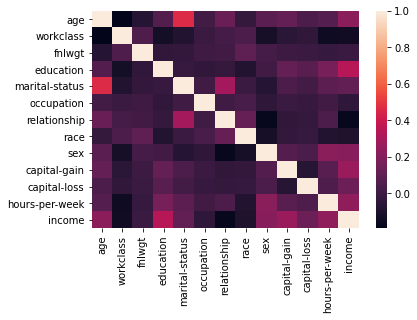

In [76]:
sns.heatmap(train_data.corr())

In [78]:
train_data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,5,77516,3,0,8,3,0,1,1,0,1,0,0
1,3,3,83311,3,1,4,2,0,1,0,0,0,0,0
2,2,7,215646,1,2,6,3,0,1,0,0,1,0,0
3,4,7,234721,0,1,6,2,4,1,0,0,1,0,0
4,1,7,338409,3,1,5,0,4,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,7,257302,2,1,0,0,0,0,0,0,1,0,0
32557,2,7,154374,1,1,7,2,0,1,0,0,1,0,1
32558,4,7,151910,1,2,8,5,0,0,0,0,1,0,0
32559,1,7,201490,1,0,8,1,0,1,0,0,0,0,0


In [79]:
train_data.to_csv('clean_train_data.csv', index=False)